In [186]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


__read the file__

In [132]:
df = pd.read_csv('San_Francisco_Analysis_Neighborhoods.csv')

In [133]:
df.head()

,the_geom,NHOOD
0,MULTIPOLYGON (((-122.38157774241415 37.7530704...,Bayview Hunters Point
1,MULTIPOLYGON (((-122.40361299982803 37.7493370...,Bernal Heights
2,MULTIPOLYGON (((-122.42655500055683 37.7694849...,Castro/Upper Market
3,MULTIPOLYGON (((-122.4062259995664 37.79755900...,Chinatown
4,MULTIPOLYGON (((-122.42398200023331 37.7315519...,Excelsior


__clean NHOOD__

We found some neighborhoods have an alternative name, showing with a '/', such as 'Castro/Upper Market'. We first clean the names by removing the '/' mark and only pick the name before the '/'.

In [134]:
def get_nhood(x):
    if '/' not in x:
        return x
    else:
        return x.split('/')[0]

In [135]:
df['NHOOD'] = df['NHOOD'].apply(lambda x: get_nhood(x))
df

,the_geom,NHOOD
0,MULTIPOLYGON (((-122.38157774241415 37.7530704...,Bayview Hunters Point
1,MULTIPOLYGON (((-122.40361299982803 37.7493370...,Bernal Heights
2,MULTIPOLYGON (((-122.42655500055683 37.7694849...,Castro
3,MULTIPOLYGON (((-122.4062259995664 37.79755900...,Chinatown
4,MULTIPOLYGON (((-122.42398200023331 37.7315519...,Excelsior
5,MULTIPOLYGON (((-122.3875252162534 37.78279734...,Financial District
6,MULTIPOLYGON (((-122.44737500017301 37.7464819...,Glen Park
7,MULTIPOLYGON (((-122.45932399954084 37.7875210...,Inner Richmond
8,MULTIPOLYGON (((-122.44092200041324 37.7736349...,Golden Gate Park
9,MULTIPOLYGON (((-122.43199799957345 37.7714309...,Haight Ashbury


__get lat and lng for each neiborhood__

In [136]:
def get_lat_lng(nhood):
    
        
    address = nhood + ', California'
    geolocator = Nominatim(user_agent="sf_explorer")
    
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude

    return latitude, longitude

In [146]:
df = df.drop([39]).reset_index(drop=True)

In [138]:
df['latitude'] = df['NHOOD'].apply(lambda nhood: get_lan_lng(nhood)).apply(lambda x: x[0])

In [139]:
df['longitude'] = df['NHOOD'].apply(lambda nhood: get_lan_lng(nhood)).apply(lambda x: x[1])

In [140]:
sf_nhood = df[['NHOOD', 'latitude', 'longitude']]

In [147]:
sf_nhood

,NHOOD,latitude,longitude
0,Bayview Hunters Point,37.732318,-122.382841
1,Bernal Heights,37.742986,-122.415804
2,Castro,37.760856,-122.434957
3,Chinatown,37.794301,-122.406376
4,Excelsior,37.721794,-122.435382
5,Financial District,37.793647,-122.398938
6,Glen Park,37.734281,-122.434470
7,Inner Richmond,37.901468,-122.346476
8,Golden Gate Park,37.769368,-122.482184
9,Haight Ashbury,37.770015,-122.446952


__visualize the neiborhoods on a map__

In [31]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [32]:
# instantiate a feature group for the neiborhoods in the dataframe
nhood = folium.map.FeatureGroup()

# loop through all the neighborhoods and add each to the feature group
for lat, lng, in zip(sf_nhood.latitude, sf_nhood.longitude):
    nhood.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(nhood)

If you zoom out, you will find some neiborhoods are quite far away from the Bay are we are going to invetigate. Therefore, we drop these neighnorhoods.

__drop neighbors which are far away from Bay area__

In [148]:
sf_nhood = sf_nhood[(sf_nhood['latitude'] > 34.0)]

In [149]:
sf_nhood = sf_nhood[(sf_nhood['latitude'] < 39.0)]

In [150]:
sf_nhood = sf_nhood[(sf_nhood['longitude'] < -122.0)]

In [151]:
sf_nhood.reset_index(drop=True)

,NHOOD,latitude,longitude
0,Bayview Hunters Point,37.732318,-122.382841
1,Bernal Heights,37.742986,-122.415804
2,Castro,37.760856,-122.434957
3,Chinatown,37.794301,-122.406376
4,Excelsior,37.721794,-122.435382
5,Financial District,37.793647,-122.398938
6,Glen Park,37.734281,-122.434470
7,Inner Richmond,37.901468,-122.346476
8,Golden Gate Park,37.769368,-122.482184
9,Haight Ashbury,37.770015,-122.446952


In [153]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [154]:
# instantiate a feature group for the neiborhoods in the dataframe
nhood_new = folium.map.FeatureGroup()

# loop through all the neighborhoods and add each to the feature group
for lat, lng, in zip(sf_nhood.latitude, sf_nhood.longitude):
    nhood_new.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(nhood_new)

In [155]:
sf_nhood.shape

(32, 3)

table ready for further exploration!

In [156]:
# Get San Francisco latitude and longitude values
address = 'San Francisco, California'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.7790262 -122.4199061


__Define Foursquare Credentials and Version__

In [157]:
CLIENT_ID = 'CCL0BLXQ5KBRPAUYAV0O0XAT2Z1R43RVT0G0MUGES5NT5HWK' # my Foursquare ID
CLIENT_SECRET = 'CN3SLXFAW1MFGKDU3SL3QWHWGYSIR13VMYEYNASGQQPZBEM5' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CCL0BLXQ5KBRPAUYAV0O0XAT2Z1R43RVT0G0MUGES5NT5HWK
CLIENT_SECRET:CN3SLXFAW1MFGKDU3SL3QWHWGYSIR13VMYEYNASGQQPZBEM5


__explore the first neighborhood in our dataframe.__

In [158]:
neighborhood_latitude = sf_nhood.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = sf_nhood.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = sf_nhood.loc[0, 'NHOOD'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bayview Hunters Point are 37.732318, -122.3828412.


**Now, let's get the top 100 venues that are in 'Bayview Hunters Point' within a radius of 500 meters.**

In [159]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=CCL0BLXQ5KBRPAUYAV0O0XAT2Z1R43RVT0G0MUGES5NT5HWK&client_secret=CN3SLXFAW1MFGKDU3SL3QWHWGYSIR13VMYEYNASGQQPZBEM5&v=20180605&ll=37.732318,-122.3828412&radius=500&limit=100'

In [160]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee3c01e65fdfb234df1a529'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Bayview',
  'headerFullLocation': 'Bayview, San Francisco',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 37.7368180045, 'lng': -122.37716194252096},
   'sw': {'lat': 37.7278179955, 'lng': -122.38852045747905}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}

No results returned. Let's try the second neighborhood.

In [161]:
neighborhood_latitude = sf_nhood.loc[1, 'latitude'] # neighborhood latitude value
neighborhood_longitude = sf_nhood.loc[1, 'longitude'] # neighborhood longitude value

neighborhood_name = sf_nhood.loc[1, 'NHOOD'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bernal Heights are 37.7429861, -122.4158042.


In [162]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=CCL0BLXQ5KBRPAUYAV0O0XAT2Z1R43RVT0G0MUGES5NT5HWK&client_secret=CN3SLXFAW1MFGKDU3SL3QWHWGYSIR13VMYEYNASGQQPZBEM5&v=20180605&ll=37.7429861,-122.4158042&radius=500&limit=100'

In [163]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee3bff84d8e2536eb1d1d99'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Bernal Heights',
  'headerFullLocation': 'Bernal Heights, San Francisco',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 68,
  'suggestedBounds': {'ne': {'lat': 37.747486104500005,
    'lng': -122.4101241240684},
   'sw': {'lat': 37.7384860955, 'lng': -122.42148427593159}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4aa6b24ff964a520b24a20e3',
       'name': 'Bernal Heights Park',
       'location': {'address': '10 Bernal Heights Blvd',
        'crossStreet': 'at Anderson St',
        'lat': 37.74326497795579,

In [164]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [165]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
# nearby_venues
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.id']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/Users/CarolYing7113/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng,id
0,Bernal Heights Park,Park,37.743265,-122.414957,4aa6b24ff964a520b24a20e3
1,Esmerelda Slide Park,Playground,37.743508,-122.418121,4c35116266e40f47fea5ca8b
2,Bernal Heights Swing,Playground,37.742916,-122.415010,5782e416498e8701c54cbdec
3,Coleridge Mini Park,Scenic Lookout,37.743786,-122.419545,4aeb400bf964a52020c021e3
4,The Epicurean Trader,Gourmet Shop,37.739257,-122.417712,54e76132498e5435366425f5


In [166]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

68 venues were returned by Foursquare.


In [167]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue id']
    
    return(nearby_venues)

In [168]:
sf_nhood_venues = getNearbyVenues(names=sf_nhood['NHOOD'],
                                   latitudes=sf_nhood['latitude'],
                                   longitudes=sf_nhood['longitude']
                                  )

Bayview Hunters Point
Bernal Heights
Castro
Chinatown
Excelsior
Financial District
Glen Park
Inner Richmond
Golden Gate Park
Haight Ashbury
Hayes Valley
Inner Sunset
Japantown
Tenderloin
Lone Mountain
Russian Hill
Mission Bay
Nob Hill
Seacliff
Noe Valley
North Beach
Oceanview
South of Market
Outer Richmond
Pacific Heights
Potrero Hill
Presidio
Presidio Heights
Treasure Island
Twin Peaks
Visitacion Valley
Western Addition


check the dataframe

In [169]:
print(sf_nhood_venues.shape)
sf_nhood_venues.head()

(1525, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
0,Bernal Heights,37.742986,-122.415804,Bernal Heights Park,37.743265,-122.414957,Park,4aa6b24ff964a520b24a20e3
1,Bernal Heights,37.742986,-122.415804,Esmerelda Slide Park,37.743508,-122.418121,Playground,4c35116266e40f47fea5ca8b
2,Bernal Heights,37.742986,-122.415804,Bernal Heights Swing,37.742916,-122.415010,Playground,5782e416498e8701c54cbdec
3,Bernal Heights,37.742986,-122.415804,Coleridge Mini Park,37.743786,-122.419545,Scenic Lookout,4aeb400bf964a52020c021e3
4,Bernal Heights,37.742986,-122.415804,The Epicurean Trader,37.739257,-122.417712,Gourmet Shop,54e76132498e5435366425f5


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

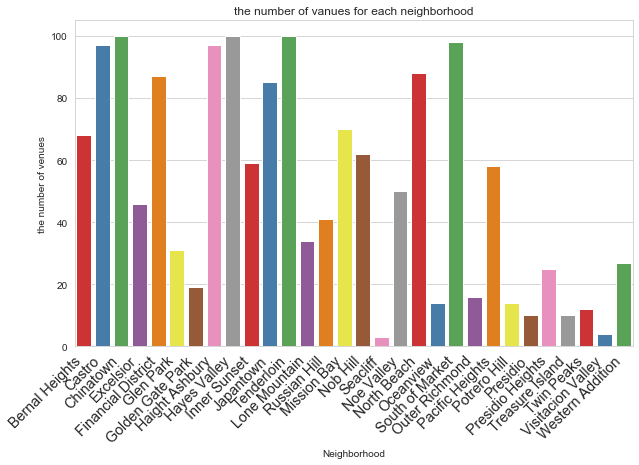

In [196]:
plt.figure(figsize=(10,6))
sns.countplot(x='Neighborhood',data=sf_nhood_venues, palette='Set1')
plt.title('the number of vanues for each neighborhood')
plt.ylabel('the number of venues')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

check by grouping by each neighbor

In [170]:
sf_nhood_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
Neighborhood,,,,,,,
Bernal Heights,68,68,68,68,68,68,68
Castro,97,97,97,97,97,97,97
Chinatown,100,100,100,100,100,100,100
Excelsior,46,46,46,46,46,46,46
Financial District,87,87,87,87,87,87,87
Glen Park,31,31,31,31,31,31,31
Golden Gate Park,19,19,19,19,19,19,19
Haight Ashbury,97,97,97,97,97,97,97
Hayes Valley,100,100,100,100,100,100,100


## Analyze Each Neighborhood

In [65]:
# one hot encoding
sf_nhood_onehot = pd.get_dummies(sf_nhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_nhood_onehot['Neighborhood'] = sf_nhood_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_column = sf_nhood_onehot['Neighborhood']
sf_nhood_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
sf_nhood_onehot.insert(0, 'Neighborhood', fixed_column)

sf_nhood_onehot.head()

,Neighborhood,Acai House,Accessories Store,Adult Boutique,Alternative Healer,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dive Shop,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Island,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nabe Restaurant,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Physical Therapist,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Restaurant,Road,Rock Club,Roof Deck,Rugby Pitch,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trade School,Trail,Trattoria/Osteria,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bernal Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

__group rows by neighborhood and by taking the mean of the frequency of occurrence of each category__

In [66]:
sf_nhood_grouped = sf_nhood_onehot.groupby('Neighborhood').mean().reset_index()
sf_nhood_grouped

,Neighborhood,Acai House,Accessories Store,Adult Boutique,Alternative Healer,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dive Shop,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Island,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nabe Restaurant,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Physical Therapist,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Restaurant,Road,Rock Club,Roof Deck,Rugby Pitch,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trade School,Trail,Trattoria/Osteria,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bernal Heights,0.000000,0.000000,0.000000,0.000000,0.029412,0.00,0.000000,0.000000,0.014706,0.0,0.000000,0.00,0.000000,0.029412,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000,

In [197]:
sf_nhood_grouped.shape

(29, 274)

__print each neighborhood along with the top 5 most common venues__

In [67]:
num_top_venues = 5

for hood in sf_nhood_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sf_nhood_grouped[sf_nhood_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bernal Heights----
                venue  freq
0         Coffee Shop  0.06
1  Mexican Restaurant  0.04
2  Italian Restaurant  0.04
3         Yoga Studio  0.03
4         Pizza Place  0.03


----Castro----
               venue  freq
0            Gay Bar  0.09
1        Coffee Shop  0.05
2    Thai Restaurant  0.04
3  Indian Restaurant  0.03
4          Pet Store  0.03


----Chinatown----
                     venue  freq
0       Italian Restaurant  0.07
1       Chinese Restaurant  0.06
2              Coffee Shop  0.06
3  New American Restaurant  0.04
4             Cocktail Bar  0.04


----Excelsior----
                   venue  freq
0     Mexican Restaurant  0.11
1                 Bakery  0.09
2  Vietnamese Restaurant  0.07
3            Pizza Place  0.04
4         Sandwich Place  0.04


----Financial District----
                  venue  freq
0           Coffee Shop  0.09
1            Food Truck  0.05
2                  Café  0.05
3  Gym / Fitness Center  0.05
4           Men's Store  0.

__put that into a pandas dataframe__

In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sf_nhood_grouped['Neighborhood']

for ind in np.arange(sf_nhood_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_nhood_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bernal Heights,Coffee Shop,Mexican Restaurant,Italian Restaurant,Playground,Gourmet Shop,Grocery Store,Food Truck,Cocktail Bar,Trail,Bakery
1,Castro,Gay Bar,Coffee Shop,Thai Restaurant,Indian Restaurant,Pet Store,Yoga Studio,New American Restaurant,Mediterranean Restaurant,Deli / Bodega,Convenience Store
2,Chinatown,Italian Restaurant,Chinese Restaurant,Coffee Shop,New American Restaurant,Cocktail Bar,Bakery,Hotel,Tea Room,Bubble Tea Shop,Szechuan Restaurant
3,Excelsior,Mexican Restaurant,Bakery,Vietnamese Restaurant,Chinese Restaurant,Deli / Bodega,Pizza Place,Latin American Restaurant,Pharmacy,Sandwich Place,Bank
4,Financial District,Coffee Shop,Gym,Food Truck,Men's Store,Café,Gym / Fitness Center,Restaurant,Park,New American Restaurant,Japanese Restaurant


In [199]:
neighborhoods_venues_sorted.shape

(29, 12)

## Cluster Neighborhoods

In [70]:
# set number of clusters
kclusters = 5

sf_nhood_grouped_clustering = sf_nhood_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_nhood_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 4, 0, 0, 0], dtype=int32)

In [71]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sf_nhood_merged = sf_nhood
sf_nhood_merged.rename(columns={'NHOOD': 'Neighborhood'}, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sf_nhood_merged = sf_nhood_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [72]:
sf_nhood_merged.head() # check the last columns!

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview Hunters Point,37.732318,-122.382841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bernal Heights,37.742986,-122.415804,0.0,Coffee Shop,Mexican Restaurant,Italian Restaurant,Playground,Gourmet Shop,Grocery Store,Food Truck,Cocktail Bar,Trail,Bakery
2,Castro,37.760856,-122.434957,0.0,Gay Bar,Coffee Shop,Thai Restaurant,Indian Restaurant,Pet Store,Yoga Studio,New American Restaurant,Mediterranean Restaurant,Deli / Bodega,Convenience Store
3,Chinatown,37.794301,-122.406376,0.0,Italian Restaurant,Chinese Restaurant,Coffee Shop,New American Restaurant,Cocktail Bar,Bakery,Hotel,Tea Room,Bubble Tea Shop,Szechuan Restaurant
4,Excelsior,37.721794,-122.435382,0.0,Mexican Restaurant,Bakery,Vietnamese Restaurant,Chinese Restaurant,Deli / Bodega,Pizza Place,Latin American Restaurant,Pharmacy,Sandwich Place,Bank


In [73]:
sf_nhood_merged.dtypes

Neighborhood               object
latitude                  float64
longitude                 float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

__drop NaN rows and change float to int__

In [116]:
sf_nhood_merged.dropna(inplace=True)

In [117]:
sf_nhood_merged['Cluster Labels'] = sf_nhood_merged['Cluster Labels'].astype(int)

__visualize the resulting clusters__

In [118]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_nhood_merged['latitude'], sf_nhood_merged['longitude'], sf_nhood_merged['Neighborhood'], sf_nhood_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters¶

__cluster1__

In [119]:
sf_nhood_merged.loc[sf_nhood_merged['Cluster Labels'] == 0, sf_nhood_merged.columns[[0] + list(range(4, sf_nhood_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bernal Heights,Coffee Shop,Mexican Restaurant,Italian Restaurant,Playground,Gourmet Shop,Grocery Store,Food Truck,Cocktail Bar,Trail,Bakery
2,Castro,Gay Bar,Coffee Shop,Thai Restaurant,Indian Restaurant,Pet Store,Yoga Studio,New American Restaurant,Mediterranean Restaurant,Deli / Bodega,Convenience Store
3,Chinatown,Italian Restaurant,Chinese Restaurant,Coffee Shop,New American Restaurant,Cocktail Bar,Bakery,Hotel,Tea Room,Bubble Tea Shop,Szechuan Restaurant
4,Excelsior,Mexican Restaurant,Bakery,Vietnamese Restaurant,Chinese Restaurant,Deli / Bodega,Pizza Place,Latin American Restaurant,Pharmacy,Sandwich Place,Bank
5,Financial District,Coffee Shop,Gym,Food Truck,Men's Store,Café,Gym / Fitness Center,Restaurant,Park,New American Restaurant,Japanese Restaurant
6,Glen Park,Coffee Shop,Café,Park,Bubble Tea Shop,Grocery Store,Bookstore,Sushi Restaurant,Mexican Restaurant,Gift Shop,Breakfast Spot
9,Haight Ashbury,Boutique,Thrift / Vintage Store,Café,Breakfast Spot,Convenience Store,Clothing Store,Board Shop,Gift Shop,Shoe Store,Bookstore
10,Hayes Valley,Clothing Store,Wine Bar,Boutique,French Restaurant,Pizza Place,Dessert Shop,Bakery,Café,Ice Cream Shop,Food & Drink Shop
11,Inner Sunset,Ice Cream Shop,Coffee Shop,Pizza Place,Sandwich Place,Sushi Restaurant,Breakfast Spot,Thai Restaurant,Gym,Korean Restaurant,Bakery
12,Japantown,Tea Room,Bakery,Gift Shop,Ice Cream Shop,Boutique,Japanese Restaurant,Grocery Store,Karaoke Bar,Shopping Mall,Ramen Restaurant


__cluster2__

In [120]:
sf_nhood_merged.loc[sf_nhood_merged['Cluster Labels'] == 1, sf_nhood_merged.columns[[0] + list(range(4, sf_nhood_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,Visitacion Valley,Baseball Field,Coffee Shop,Vietnamese Restaurant,Chinese Restaurant,Food & Drink Shop,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food


__cluster3__

In [121]:
sf_nhood_merged.loc[sf_nhood_merged['Cluster Labels'] == 2, sf_nhood_merged.columns[[0] + list(range(4, sf_nhood_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Seacliff,Beach,Playground,Yoga Studio,Food Truck,Filipino Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Fountain


__cluster4__

In [122]:
sf_nhood_merged.loc[sf_nhood_merged['Cluster Labels'] == 3, sf_nhood_merged.columns[[0] + list(range(4, sf_nhood_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Twin Peaks,Trail,Scenic Lookout,Reservoir,Garden,Tailor Shop,Bus Stop,Hill,Fountain,Food Truck,Food & Drink Shop


__cluster5__

In [123]:
sf_nhood_merged.loc[sf_nhood_merged['Cluster Labels'] == 4, sf_nhood_merged.columns[[0] + list(range(4, sf_nhood_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Golden Gate Park,Park,Music Venue,Lake,Harbor / Marina,Track,Waterfall,Disc Golf,Bus Stop,Sculpture Garden,BBQ Joint


## Examine the safty rate of neighborhoods

In [82]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [386]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [387]:
df_incidents.shape

(150500, 13)

In [388]:
# get the first 1000 crimes in the df_incidents dataframe
limit = 1000
df_incidents = df_incidents.iloc[0:limit, :]

In [389]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map